<div align="center">
  <img src="https://m.economictimes.com/thumb/msid-100281493,width-1200,height-900,resizemode-4,imgsize-14062/banks-request-rbi-for-more-time-for-new-loan-provisioning-system.jpg" alt="Image Description" width="300" height="200">
</div>

# <div style="color:white;display:fill;border-radius:5px;background-color:#CC6C6C;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:center"><font face = 'Noto Sans'>Bank Churn Analysis & Modeling</font></p></div>


<div style="font-family:Noto Sans;background-color:'#DEB887'; font-size:16px">
<p style=font-size:100%;margin:0;>
<font color=#CC6C6C><b>Churn</b></font> refers to customers leaving a bank or discontinuing their banking services.<br>
Our goal is to forecast whether a client will leave the bank soon.</p></div>

# <b><span style='color:#162b78'><font face = 'Noto Sans'>Importing Libraries</font></span></b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings as w
import plotly.express as px
import plotly.graph_objects as go
w.filterwarnings("ignore")
plt.style.use('ggplot')

### `Loading Data`

In [2]:
df = pd.read_csv(r'C:\Users\SachinR\Downloads\WS P\Bank Customers Churn 14\Bank_Churn_14.csv')

# <b><span style='color:#162b78'><font face = 'Noto Sans'>Data Understanding </font></span></b>
- Dataframe `shape`
- `head` and `tail`
- `dtypes`
- `describe`


#### `Checking the number of rows & columns present in dataframe`


In [3]:
df.shape

(10000, 14)

The Df has 10000 rows with 14 attributes.

#### `See top 5 Rows`

In [4]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

#### `All Columns/Features in the Dataframe`

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

There are total 14 categorical column in our dataset

#### `Column Data Types`

In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Our dataset mostly consists of numerical columns.

#### `Basic Statistics of Numerical Columns`

In [7]:
df.describe().round(3).T

count          mean        std          min          25%  \
RowNumber        10000.0  5.000500e+03   2886.896         1.00      2500.75   
CustomerId       10000.0  1.569094e+07  71936.186  15565701.00  15628528.25   
CreditScore      10000.0  6.505290e+02     96.653       350.00       584.00   
Age              10000.0  3.892200e+01     10.488        18.00        32.00   
Tenure           10000.0  5.013000e+00      2.892         0.00         3.00   
Balance          10000.0  7.648589e+04  62397.405         0.00         0.00   
NumOfProducts    10000.0  1.530000e+00      0.582         1.00         1.00   
HasCrCard        10000.0  7.060000e-01      0.456         0.00         0.00   
IsActiveMember   10000.0  5.150000e-01      0.500         0.00         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.493        11.58     51002.11   
Exited           10000.0  2.040000e-01      0.403         0.00         0.00   

                          50%           75%          max  
RowNumber        5.000500e+03  7.500250e+03     10000.00  
CustomerId       1.569074e+07  1.575323e+07  15815690.00  
CreditScore      6.520000e+02  7.180000e+02       850.00  
Age              3.700000e+01  4.400000e+01        92.00  
Tenure           5.000000e+00  7.000000e+00        10.00  
Balance          9.719854e+04  1.276442e+05    250898.09  
NumOfProducts    1.000000e+00  2.000000e+00         4.00  
HasCrCard        1.000000e+00  1.000000e+00         1.00  
IsActiveMember   1.000000e+00  1.000000e+00         1.00  
EstimatedSalary  1.001939e+05  1.493882e+05    199992.48  
Exited           0.000000e+00  0.000000e+00         1.00

#### `Basic Statistics of Categorical Columns using Transpose`

In [8]:
df.describe(include='object').T

count unique     top  freq
Surname    10000   2932   Smith    32
Geography  10000      3  France  5014
Gender     10000      2    Male  5457

#### `Checking for missing values`

In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Well isn't that a rare find; no missing values!

#### `Removing unnecessary column`

`RowNumber`, `Surname` and `CustomerId` columns are not relevant for predicting customer churned or not. So we can simply drop these features.

In [10]:
df.drop(['RowNumber','Surname','CustomerId'],axis=1,inplace=True)

# <b><span style='color:#162b78'><font face = 'Noto Sans'>Exploratory Data Analysis </font></span></b>

#### `Separate Numeric Columns`

In [11]:
num_cols = df.select_dtypes(['int','float64']).columns
num_cols

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

There are 10 Numeric Columns in the dataset and we store it in a variable name 'num_cols'.

#### `Separate Categorical Columns`

In [12]:
cols = df.select_dtypes('object').columns
cols

Index(['Geography', 'Gender'], dtype='object')

There are 2 Categorical Columns in the dataset and we store it in a variable name 'cols'.

### `Target Distribution`

In [13]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

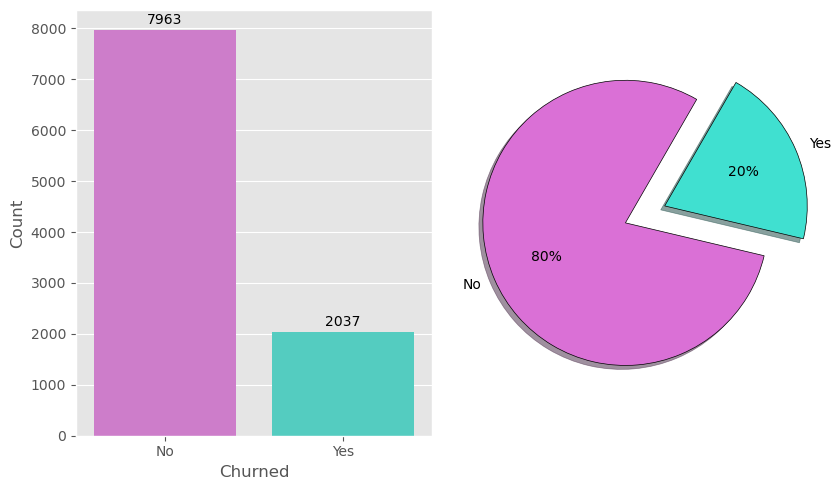

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(8.5, 5))

sns.countplot(x="Exited", data=df, palette=['orchid', 'turquoise'], ax=axes[0])
axes[0].set_xlabel("Churned")
axes[0].set_ylabel("Count")
ax = axes[0]
ax.bar_label(ax.containers[0], padding = 2)
axes[0].set_xticklabels(["No", "Yes"])


colors = ['orchid', 'turquoise']
count = df["Exited"].value_counts()
labels = ["No", "Yes"]
axes[1].pie(count, labels=labels, autopct='%1.f%%', startangle=60, explode=[0, 0.3], colors=colors,
            wedgeprops={'edgecolor': 'black'}, shadow=True)

plt.tight_layout()
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Out of a total of `9,730` customers, `2,037` have decided to <font color = Red>Exit</font> the bank, while `7,693` have chosen to <font color = Green>Stay</font>.

#### `Age Distribution`

In [15]:
fig = px.histogram(df, x="Age", title="Age Distribution", color_discrete_sequence=['#F1948A'])
fig.update_layout(
    xaxis_title="Age",
    yaxis_title="Count",
    height=400,
    width=900
)
fig.show()


Most customers are between ages `30` and `40`

#### `Understanding Gender Distribution`

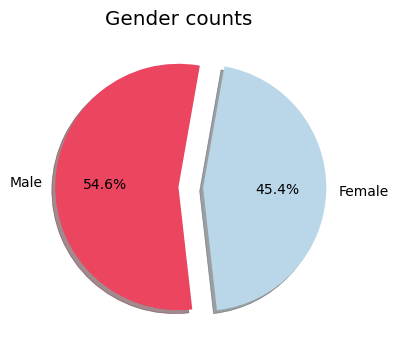

In [16]:
plt.figure(figsize=(4,4))
plt.pie(df['Gender'].value_counts(),
        labels=df['Gender'].value_counts().index,
        rotatelabels=False, 
        autopct='%1.1f%%',
        colors=['#EB455F','#BAD7E9'],
        shadow=True, 
        startangle=80,
        explode=(0,0.2))
plt.title('Gender counts')
plt.show()

`54.6%` of the individuals are male, while the remaining `45.4%` are female.

#### `Country Counts`

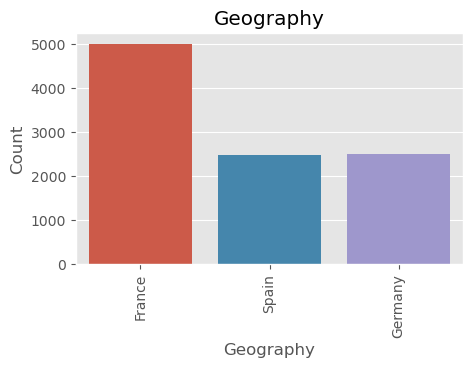

In [17]:
plt.figure(figsize=(5,3))
sns.countplot(data=df, x='Geography')
plt.title('Geography')
plt.xticks(rotation=90)
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

The dataset comprises three countries: `France`, `Spain`, and `Germany`, listed in the order of their respective counts

#### `Credit Score Distribution`

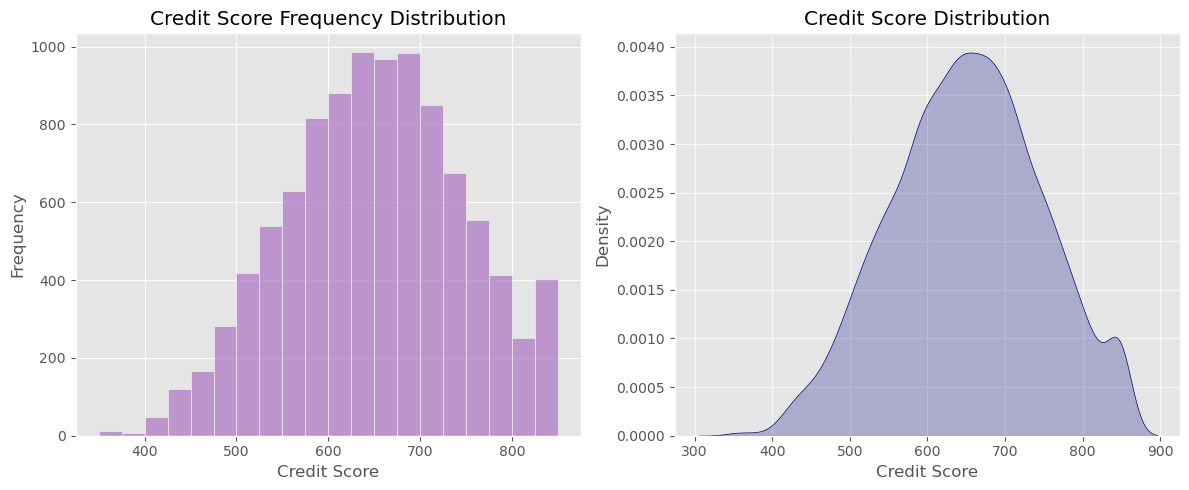

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the histogram on the first subplot
sns.histplot(df['CreditScore'], bins=20, color='#AF7AC5', ax=axes[0])
axes[0].set_title('Credit Score Frequency Distribution')
axes[0].set_xlabel('Credit Score')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# Plot the kernel density plot on the second subplot
sns.kdeplot(df['CreditScore'], shade=True, color='navy', ax=axes[1])
axes[1].set_title('Credit Score Distribution')
axes[1].set_xlabel('Credit Score')
axes[1].set_ylabel('Density')
axes[1].grid(True, alpha=0.7)

plt.tight_layout()
plt.show()

Most accounts have a credit score between `550` and `700`

#### `Balance distribution across accounts`

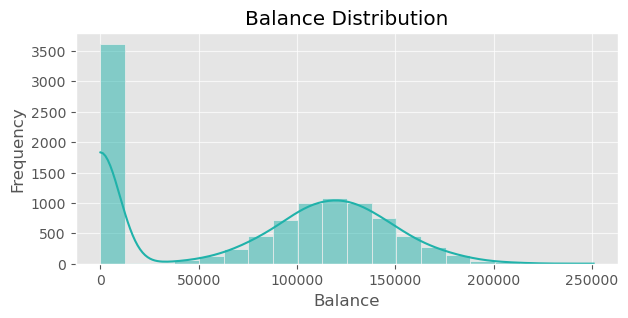

In [19]:
plt.figure(figsize=(7,3))
sns.histplot(df['Balance'], bins=20, kde=True, color='lightseagreen')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.7)
plt.show()

A lot of customers have `0` balance and the rest have balance between `50k` and `200k`

#### `Boxplots for Numerical Columns`

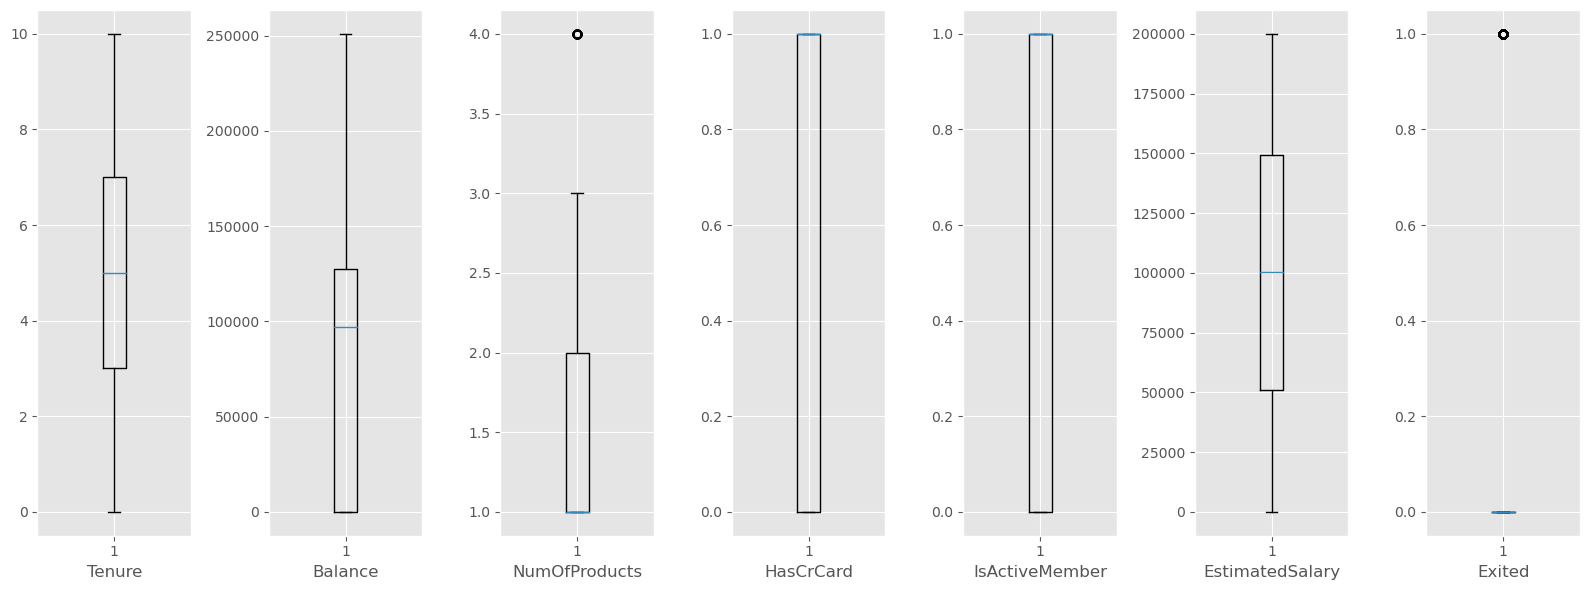

In [20]:
fig, axes = plt.subplots(1,7, figsize=(16, 6))

# Box plot for each numerical column
for i, col in enumerate(num_cols[2:]):
    axes[i].boxplot(df[col])
    axes[i].set_xlabel(col.replace('_',' '))

plt.tight_layout()
plt.show()

We see that our dataframe does not have too many outliers. Only NumOfProducts have a few outliers. Fortunately, these outliers are not expected to influence our predictions, we can ignore them.

#### `Correlation Heatmap`

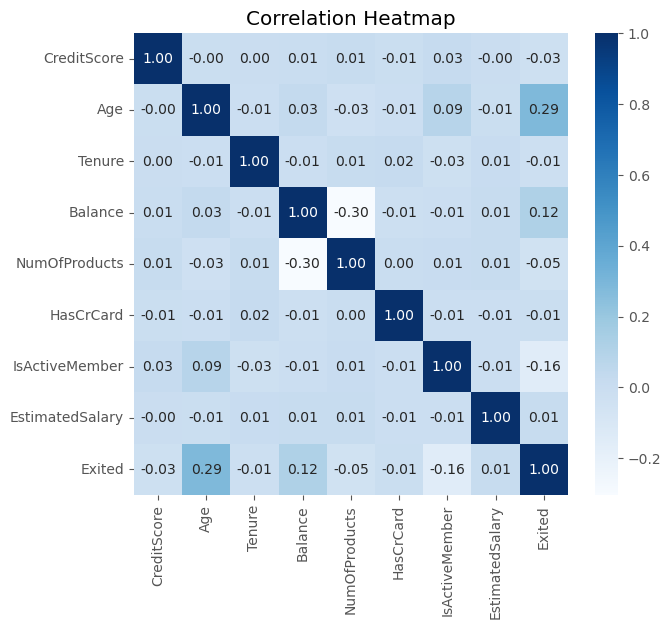

In [21]:
plt.figure(figsize=(7,6))
plt.title('Correlation Heatmap')
sns.heatmap(df[num_cols].corr(), annot=True,fmt = ".2f",cmap='Blues')
plt.show()

Most of the features don't show any significant correlation. `Age` has a correlation of `0.29` with the target. We will analyse it further.

#### `Does Gender play a role in customer churn?`
- Yes, Females are `more likely` to churn

<Figure size 400x300 with 0 Axes>

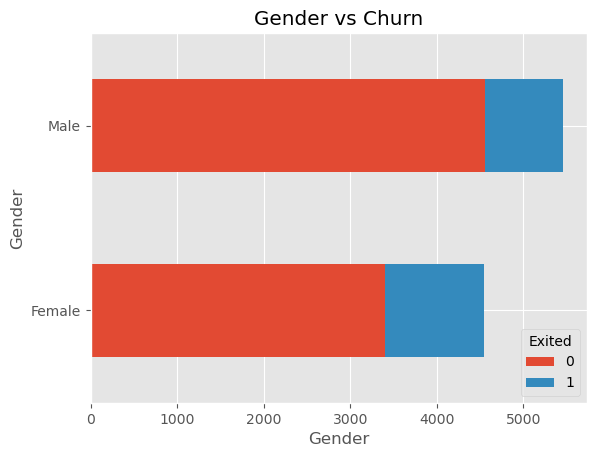

In [22]:
plt.figure(figsize=(4,3))
plot_data = df.groupby('Gender')['Exited'].value_counts().unstack()
plot_data.plot(kind='barh', stacked=True)
plt.title('Gender vs Churn')
plt.xlabel('Gender')
plt.show()

#### `Credit Score vs Churn`
- Churned customers have `lower` median credit

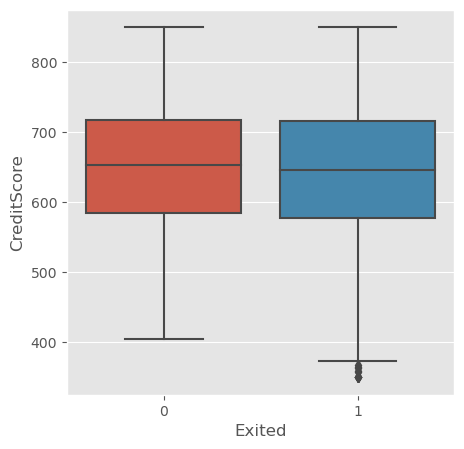

In [23]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df,x='Exited',y='CreditScore')
plt.show()

#### `Age and Salary's impact on churn`

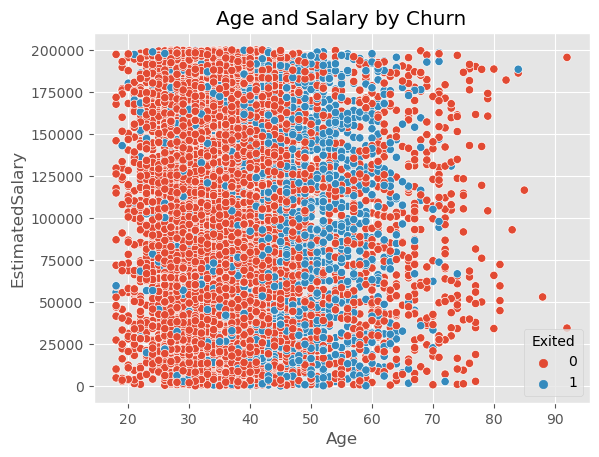

In [24]:
ax = sns.scatterplot(x='Age',y='EstimatedSalary',hue='Exited',data=df)
ax.set_title('Age and Salary by Churn')
plt.show()

We can see that the Churned customers are concentrated around ages `50` and `60` 

#### `Exits vs Age`
#### Does age play a role in churn?
- Older people are more likey to churn

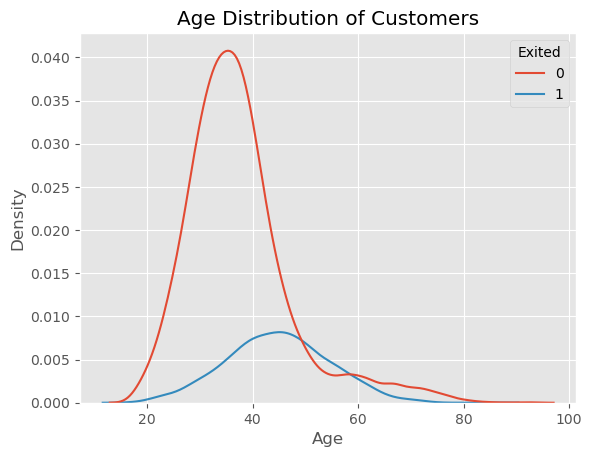

In [25]:
sns.kdeplot(x=df['Age'],hue=df['Exited'])
plt.title("Age Distribution of Customers")
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

#### `Exits vs Products`
#### Does number of products matter?
- Customers with 3-4 products are more likely to churn

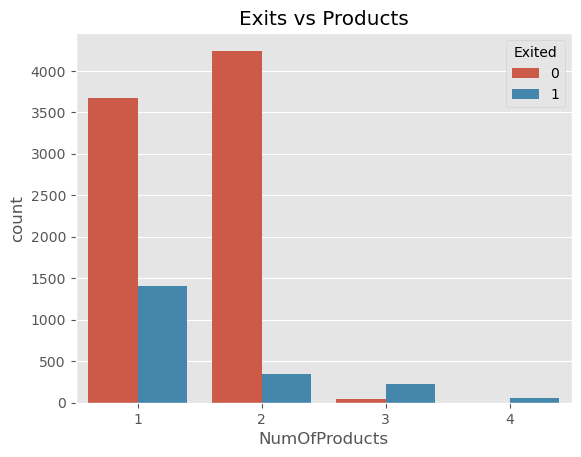

In [26]:
sns.countplot(x = "NumOfProducts", hue="Exited", data = df)
plt.title("Exits vs Products")
plt.show()

#### `Age and Products combined`
- We see that the middle aged people are most likely to churn especially if they own multiple products

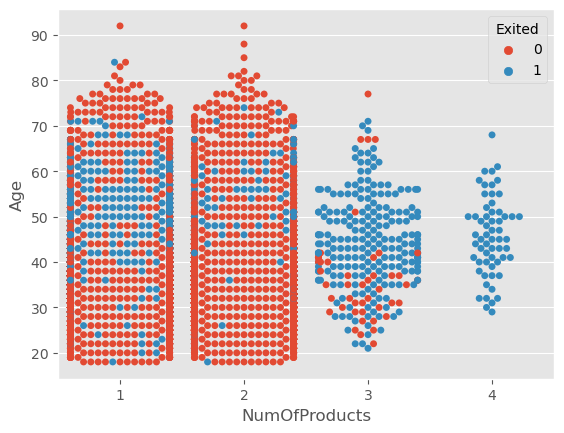

In [27]:
sns.swarmplot(x = "NumOfProducts", y = "Age", hue="Exited", data = df)
plt.show()

#### `Activity Status vs Churn`
- Inactive members are more likely to churn

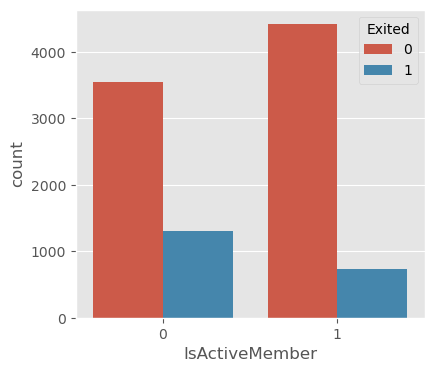

In [28]:
plt.figure(figsize=(4.5,4))
sns.countplot(x = "IsActiveMember", hue="Exited", data = df)
plt.show()

#### IsInactive and Age vs Churn
- Inactive senior customers have higher churn

<Axes: xlabel='IsActiveMember', ylabel='Age'>

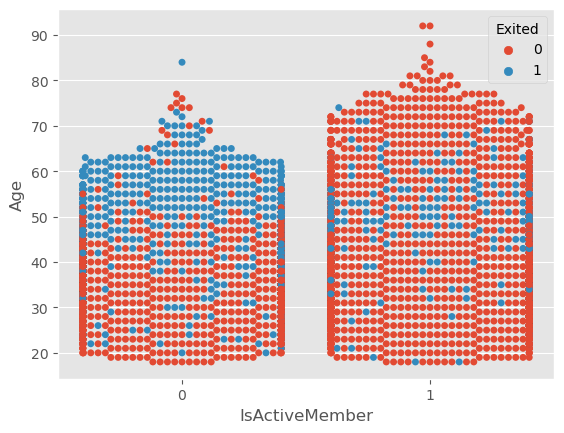

In [29]:
sns.swarmplot(x = "IsActiveMember", y = "Age", hue="Exited", data = df)

#### `Graphical representation of numerical data using Pairplot`

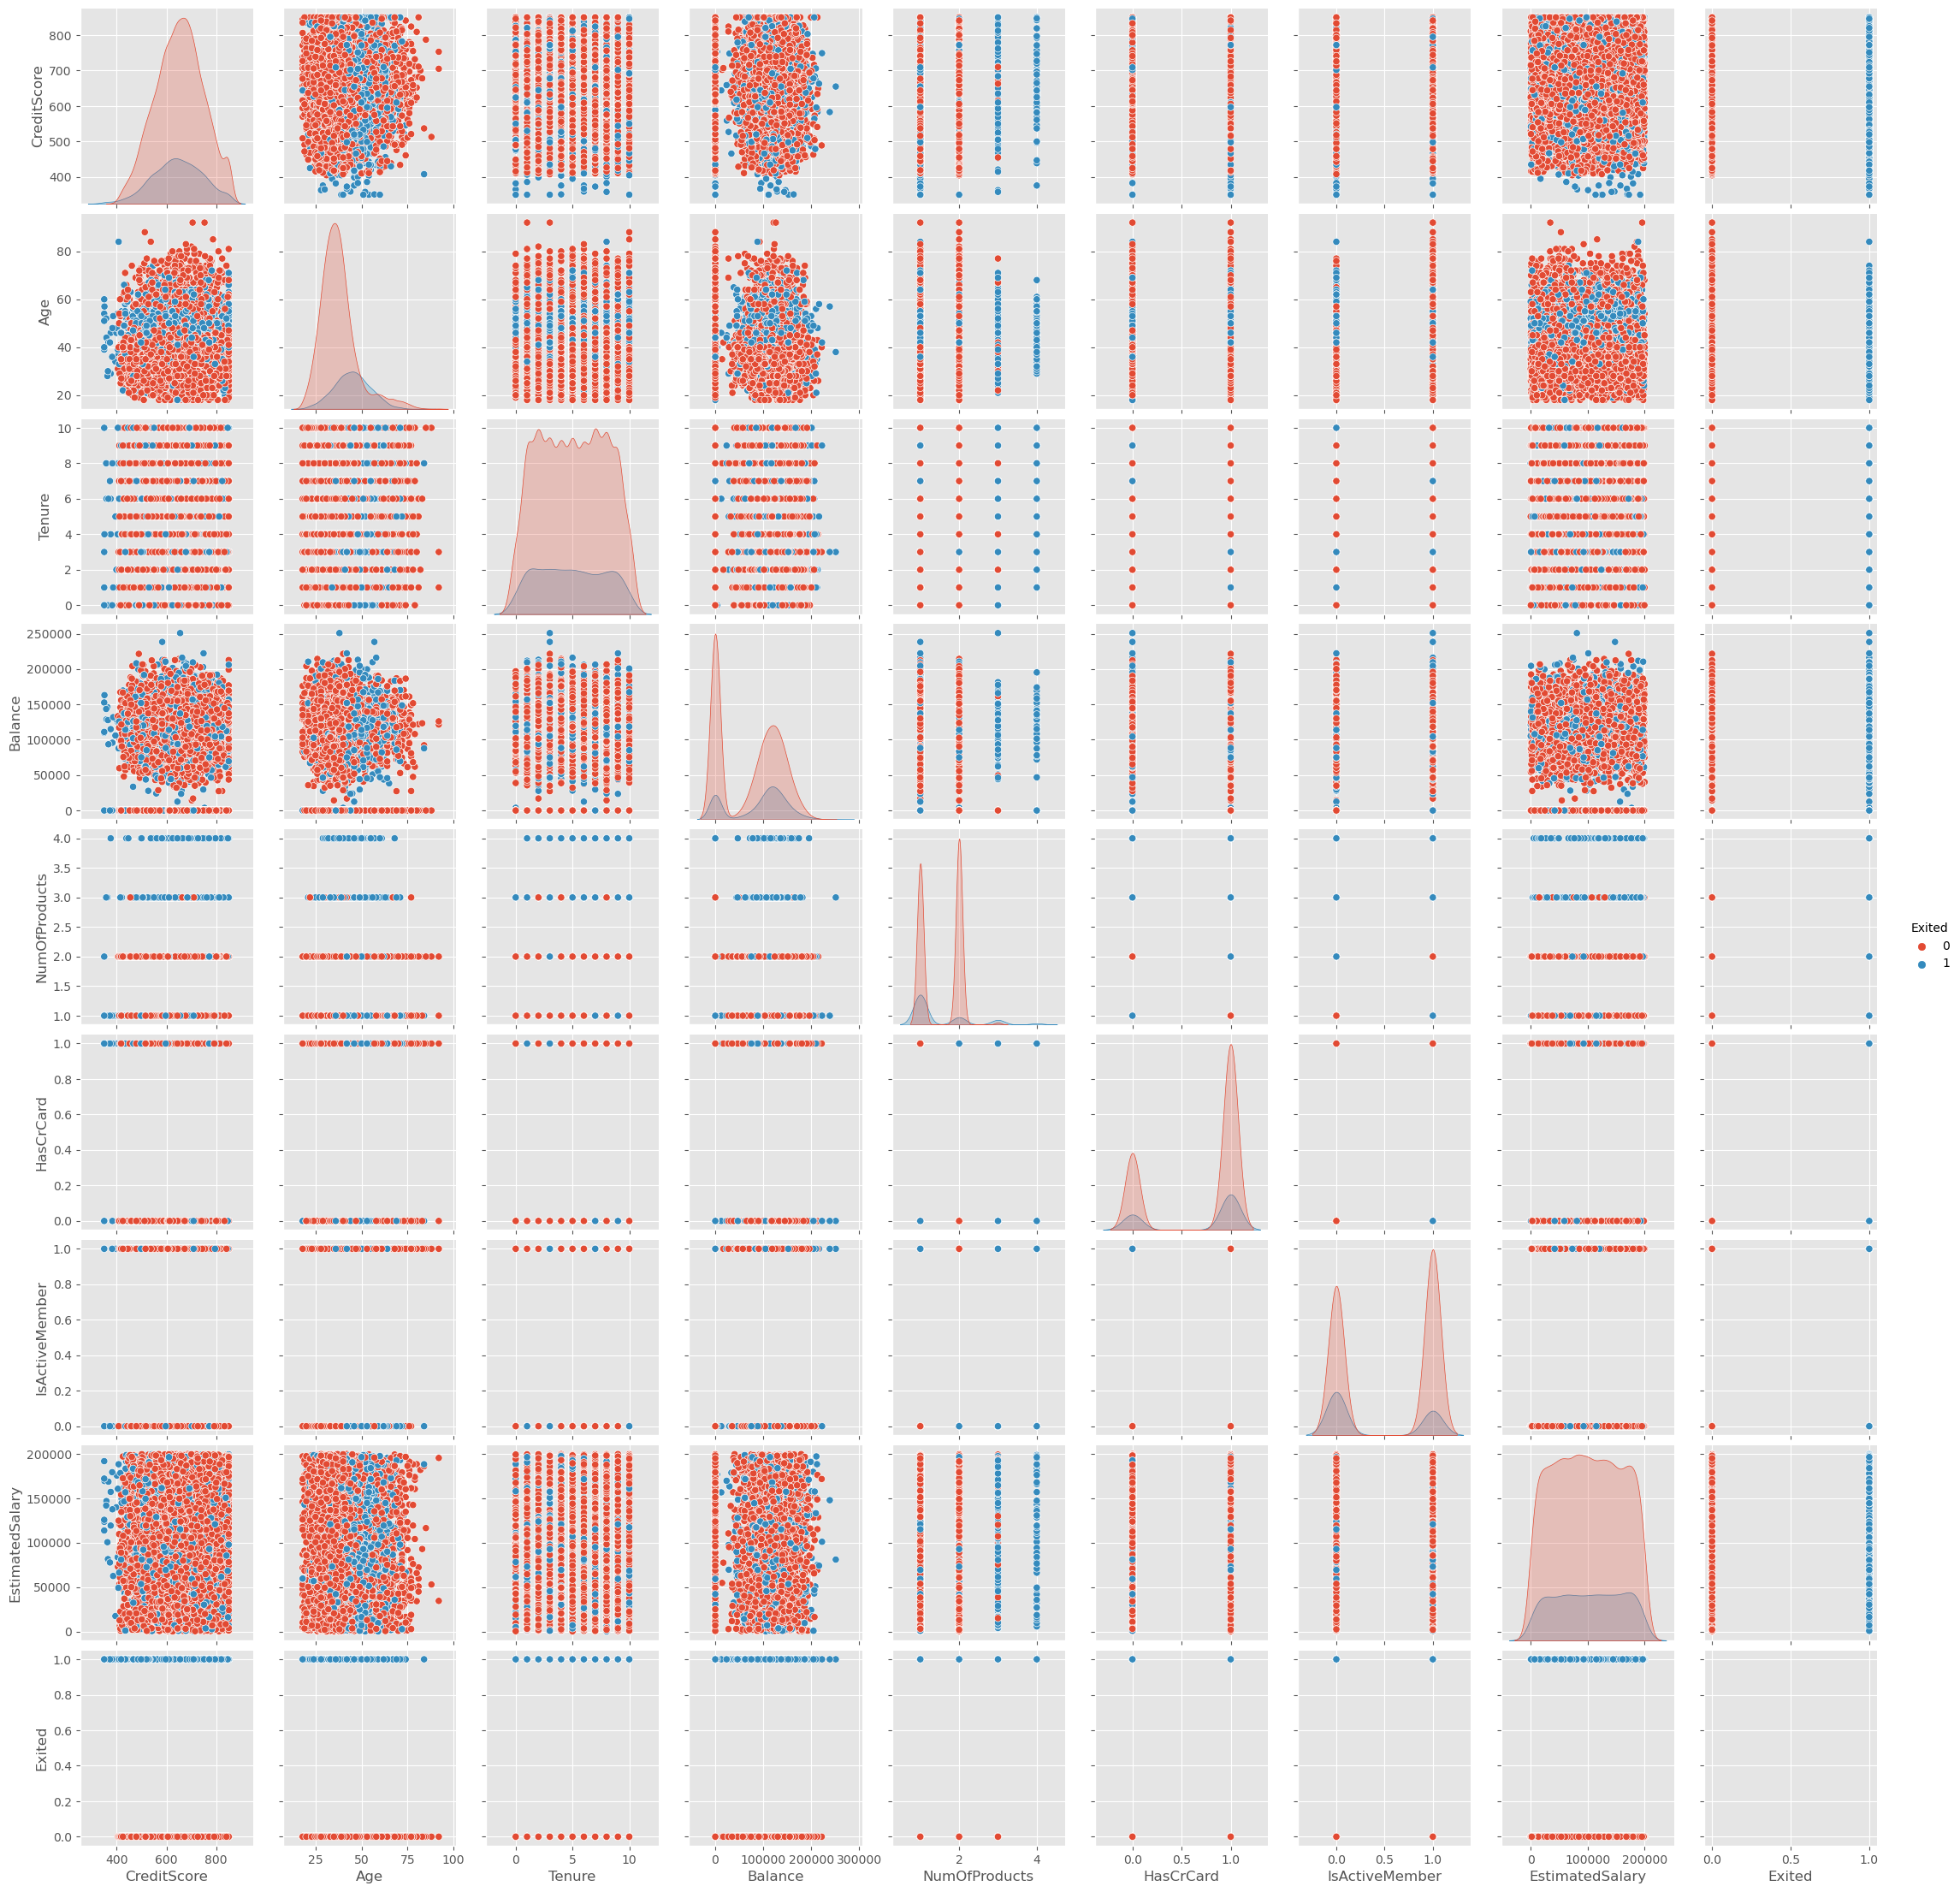

In [30]:
sns.pairplot(df,vars=num_cols,hue='Exited')
plt.show()

# <b><span style='color:#162b78'><font face = 'Noto Sans'>Data Preprocessing </font></span></b>
- Splitting `Features` and `Target`
- `Encoding`
- `Scaling`
- `Balancing`

### `Splitting data into features(x) and target(y)`

In [31]:
x = df.iloc[:,:-1]
y = df['Exited']

### Encoding
Encoding is the process of converting `categorical` data into `numerical` form
- `OneHot` 
: Encoded categorical `Geography` data into binary variables and renamed them for analysis
- `Label` 
: Applied label encoding to transform `Gender` into numerical values `0` and `1`.

In [32]:
#OneHot
x = pd.get_dummies(x, columns=['Geography'], drop_first=True)
x.rename(columns={'Geography_Germany': 'Geo_Germany','Geography_Spain': 'Geo_Spain'}, inplace=True)

In [33]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Gender'] = le.fit_transform(x['Gender'])

In [34]:
x.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Geo_Germany  Geo_Spain  
0               1        101348.88        False      False  
1               1        112542.58        False       True  
2               0        113931.57        False      False  
3               0         93826.63        False      False  
4               1         79084.10        False       True

### `Balancing` using `SMOTE`
SMOTE, or Synthetic Minority Over-sampling Technique, is a method used to solve class imbalance by oversampling the minority class.

In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=1)
x_resampled, y_resampled = smote.fit_resample(x, y)
y_resampled.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

### `Scaling`
Scaling ensures that all features have the same scale or range. This is important because many machine learning algorithms are sensitive to the scale of the input features. Without scaling, some features might dominate others in terms of their impact on the model
- StandardScaler: Data is transformed such that it has a `mean` of `0` and a `standard deviation` of `1`

In [36]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
cols_to_scale = num_cols[:-1] #Leaving out the exited column
x[cols_to_scale]=sc.fit_transform(x[cols_to_scale])
x.head()

CreditScore  Gender       Age    Tenure   Balance  NumOfProducts  \
0    -0.326221       0  0.293517 -1.041760 -1.225848      -0.911583   
1    -0.440036       0  0.198164 -1.387538  0.117350      -0.911583   
2    -1.536794       0  0.293517  1.032908  1.333053       2.527057   
3     0.501521       0  0.007457 -1.387538 -1.225848       0.807737   
4     2.063884       0  0.388871 -1.041760  0.785728      -0.911583   

   HasCrCard  IsActiveMember  EstimatedSalary  Geo_Germany  Geo_Spain  
0   0.646092        0.970243         0.021886        False      False  
1  -1.547768        0.970243         0.216534        False       True  
2   0.646092       -1.030670         0.240687        False      False  
3  -1.547768       -1.030670        -0.108918        False      False  
4   0.646092        0.970243        -0.365276        False       True

# <b><span style='color:#162b78'><font face = 'Noto Sans'>Modelling</font></span></b>
- Splitting data into `Train` and `Test`
- Training `Models`
- `Hyperparameter Tuning`

### `Train Test split`
Using the 'train_test_split' function to split the data into training and testing sets, allocating 20% of the data to testing.

In [37]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=1)
# Oversampled Data
x_sos_train, x_sos_test, y_sos_train, y_sos_test = train_test_split(x_resampled, y_resampled, test_size=0.20, random_state=1)

#### <b><span style='color:#1F4172'><font face = 'Noto Sans'>Model Metrics</span>
Creating blank lists to hold data for plotting model performance

In [38]:
model_list = [] # Model Name
model_train_acc = [] # Training Accuracy 
model_test_acc = [] # Test Accuracy

### `Logistic Regression`

In [39]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(xtrain,ytrain)
ypred_train = lreg.predict(xtrain)
ypred_test = lreg.predict(xtest)

In [40]:
# LR on Oversampled Data
from sklearn.linear_model import LogisticRegression
lreg_sos = LogisticRegression()
lreg_sos.fit(x_sos_train,y_sos_train)
lr_train_sos_acc = lreg_sos.score(x_sos_train, y_sos_train)
lr_test_sos_acc = lreg_sos.score(xtest, ytest)

print("Train set accuracy:", lr_train_sos_acc)
print("Test set accuracy:", lr_test_sos_acc)

Train set accuracy: 0.6675039246467818
Test set accuracy: 0.6765


In [41]:
# Adding to model metrics 
lr_train_acc = lreg.score(xtrain, ytrain)
lr_test_acc = lreg.score(xtest, ytest)

print("Train set accuracy:", lr_train_acc)
print("Test set accuracy:", lr_test_acc)
model_list.append('LR')
model_train_acc.append(lr_train_acc)
model_test_acc.append(lr_test_acc)

Train set accuracy: 0.812125
Test set accuracy: 0.8125


In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score,mean_squared_error
print("Train Data")
print(confusion_matrix(ytrain,ypred_train))
print("Test Data")
print(confusion_matrix(ytest,ypred_test))

Train Data
[[6166  212]
 [1291  331]]
Test Data
[[1533   52]
 [ 323   92]]


A `Confusion Matrix` provides a summary of a classification model's performance. 

It contains four key metrics:
 - True Positives (TP): Correctly predicted positive cases.
 - True Negatives (TN): Correctly predicted negative cases.
 - False Positives (FP): Incorrectly predicted positive cases (Type I error).
 - False Negatives (FN): Incorrectly predicted negative cases (Type II error).<br>
 
These metrics help assess the model's accuracy, precision, recall etc.

### `Precision Recall Curve`

In [43]:
#using slicing to check probability of 1 
ytrain_prob = lreg.predict_proba(xtrain)[:,1]
ytrain_prob

array([0.08039676, 0.16774223, 0.3476632 , ..., 0.12807334, 0.08334479,
       0.3572384 ])

In [44]:
ytest_prob = lreg.predict_proba(xtest)[:,1]
ytest_prob

array([0.09628867, 0.15458893, 0.12183095, ..., 0.04358637, 0.12753935,
       0.30661994])

In [45]:
from sklearn.metrics import classification_report
print("Train Data")
print(classification_report(ytrain,ypred_train))
print("Test Data")
print(classification_report(ytest,ypred_test))

Train Data
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6378
           1       0.61      0.20      0.31      1622

    accuracy                           0.81      8000
   macro avg       0.72      0.59      0.60      8000
weighted avg       0.78      0.81      0.77      8000

Test Data
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1585
           1       0.64      0.22      0.33       415

    accuracy                           0.81      2000
   macro avg       0.73      0.59      0.61      2000
weighted avg       0.79      0.81      0.77      2000



In [46]:
from sklearn.metrics import precision_recall_curve
p,r,th = precision_recall_curve(ytrain,ytrain_prob)

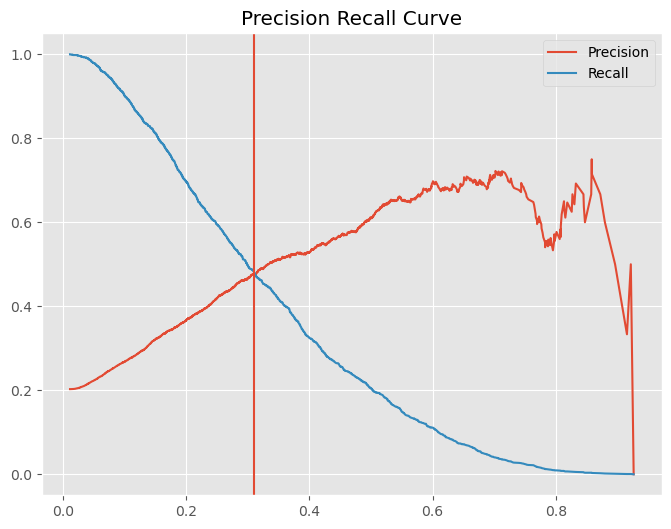

In [47]:
plt.figure(figsize=(8,6))
sns.lineplot(x=th,y=p[:-1],label='Precision')
sns.lineplot(x=th,y=r[:-1],label='Recall')
plt.title('Precision Recall Curve')
plt.axvline(0.310)
plt.show()

`Precision` Precision measures the accuracy of positive predictions made by a model.<br>
`Recall` measures the completeness of positive predictions.

### `ROC-AUC Curve`

In [48]:
from sklearn.metrics import classification_report,accuracy_score
ac = accuracy_score(ytest,ypred_test)
cr = classification_report(ytest,ypred_test)

print(f'Accuracy Score: {ac}')
print(f'\n\n {cr}')

Accuracy Score: 0.8125


               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1585
           1       0.64      0.22      0.33       415

    accuracy                           0.81      2000
   macro avg       0.73      0.59      0.61      2000
weighted avg       0.79      0.81      0.77      2000



In [49]:
print(f'Actual Values:  {ytest[:25].values}')
print(f'Predicted Values:  {ypred_test[:25]}')

Actual Values:  [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predicted Values:  [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


In [50]:
#finding xtest probability values
ypred_prob = lreg.predict_proba(xtest)[:,1]
ypred_prob

array([0.09628867, 0.15458893, 0.12183095, ..., 0.04358637, 0.12753935,
       0.30661994])

In [51]:
#Binary function convert countinues values into binary form 
from sklearn.preprocessing import binarize
ypred = binarize([ypred_prob],threshold=0.310)[0]

In [52]:
print(f'Actual Values:     {ytest[:25].values}')
print(f'Predicted Values:  {ypred[:25]}')

Actual Values:     [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predicted Values:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0.]


In [53]:
from sklearn.metrics import roc_curve
fpr,tpr,th = roc_curve(ytest,ypred_prob)

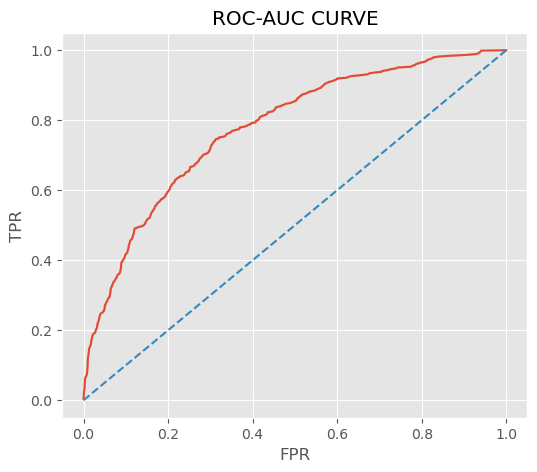

In [54]:
plt.figure(figsize=(6,5))
plt.title('ROC-AUC CURVE')
sns.lineplot(x=fpr,y=tpr)
sns.lineplot(x=[0.0,1],y=[0.0,1],linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid(True)
plt.show()

### `K-Nearest Neighbours`

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier(n_neighbors=3,)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.90      1585
           1       0.68      0.45      0.54       415

    accuracy                           0.84      2000
   macro avg       0.77      0.70      0.72      2000
weighted avg       0.83      0.84      0.83      2000



In [57]:
# KNN on Oversampled Data
knn_sos = KNeighborsClassifier(n_neighbors=3,)
knn_sos.fit(x_sos_train,y_sos_train)
knn_train_sos_acc = knn_sos.score(x_sos_train, y_sos_train)
knn_test_sos_acc = knn_sos.score(xtest, ytest)

print("Train set accuracy:", knn_train_sos_acc)
print("Test set accuracy:", knn_test_sos_acc)

Train set accuracy: 0.8368131868131868
Test set accuracy: 0.7925


#### `Hyperparameter Tuning`

In [58]:
param_grid = {'n_neighbors':[2,4,5,7,9],
              'metric':['euclidean','manhattan','minkowski'],
              'weights':['uniform','distance']}

In [59]:
from sklearn.model_selection import GridSearchCV
model=GridSearchCV(knn,param_grid,cv=3,n_jobs=1,scoring='accuracy')
model.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [2, 4, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [60]:
model.best_score_

0.8412502919505654

In [61]:
#giving best parameters
model.best_params_

{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}

In [62]:
knn = KNeighborsClassifier(n_neighbors=4,metric='manhattan',weights='uniform')
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1585
           1       0.75      0.29      0.41       415

    accuracy                           0.83      2000
   macro avg       0.79      0.63      0.66      2000
weighted avg       0.82      0.83      0.80      2000



In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypred)

array([[1545,   40],
       [ 296,  119]], dtype=int64)

In [64]:
# Adding to model metrics 
knn_train_acc = knn.score(xtrain, ytrain)
knn_test_acc = knn.score(xtest, ytest)

print("Train set accuracy:", knn_train_acc)
print("Test set accuracy:", knn_test_acc)
model_list.append('KNN')
model_train_acc.append(knn_train_acc)
model_test_acc.append(knn_test_acc)

Train set accuracy: 0.874
Test set accuracy: 0.832


### `Support Vector Machine`

In [65]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV

In [66]:
svm_model = SVC()
svm_model.fit(xtrain,ytrain)
svm_train_acc_b_ht = svm_model.score(xtrain, ytrain)
svm_test_acc_b_ht = svm_model.score(xtest, ytest)
print("Train set accuracy:", svm_train_acc_b_ht)
print("Test set accuracy:", svm_test_acc_b_ht)

Train set accuracy: 0.86275
Test set accuracy: 0.859


In [67]:
# SVM on Oversampled Data
svm_sos = SVC()
svm_sos.fit(x_sos_train,y_sos_train)
svm_train_sos_acc = svm_sos.score(x_sos_train,y_sos_train)
svm_test_sos_acc = svm_sos.score(xtest, ytest)
print("Train set accuracy:", svm_train_sos_acc)
print("Test set accuracy:", svm_test_sos_acc)

Train set accuracy: 0.5693877551020409
Test set accuracy: 0.7925


In [68]:
param_grid = {
    'kernel': ['linear', 'rbf',],
    'C': [1, 10],
    'gamma': [1, 10]}

#### `Hyperparameter Tuning`

In [69]:
gd = GridSearchCV(svm_model, param_grid, cv=3, scoring='accuracy') 
gd.fit(xtrain,ytrain) 
ypred = gd.predict(xtest)

In [70]:
best_svm_model = gd.best_estimator_
best_parameters = gd.best_params_
best_score = gd.best_score_

print("Best Parameters:", best_parameters)
print("Best Cross-Validation Accuracy:", best_score)

Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.8194999631047618


In [71]:
# Adding to model metrics 
svc_train_acc = best_svm_model.score(xtrain, ytrain)
svc_test_acc = best_svm_model.score(xtest, ytest)

print("Train set accuracy:", svc_train_acc)
print("Test set accuracy:", svc_test_acc)
model_list.append('SVC')
model_train_acc.append(svc_train_acc)
model_test_acc.append(svc_test_acc)

Train set accuracy: 0.939375
Test set accuracy: 0.822


### `Decision Tree`

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [74]:
# DT on Oversampled Data
dt_sos = DecisionTreeClassifier()
dt_sos.fit(x_sos_train,y_sos_train)
dt_train_sos_acc = dt_sos.score(x_sos_train,y_sos_train)
dt_test_sos_acc = dt_sos.score(xtest, ytest)
print("Train set accuracy:", dt_train_sos_acc)
print("Test set accuracy:", dt_test_sos_acc)

Train set accuracy: 1.0
Test set accuracy: 0.784


In [75]:
from sklearn.metrics import classification_report

In [76]:
ytrain_pred = dt.predict(xtrain)
ytest_pred = dt.predict(xtest)

In [77]:
train = dt.score(xtrain,ytrain) 
test = dt.score(xtest,ytest) 
print(f'Training result: {train}')
print(f'Testing result: {test}')

Training result: 1.0
Testing result: 0.7985


#### `Hyperparameter Tuning`

In [78]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']}


In [79]:
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [80]:
best_dt_model = grid_search.best_estimator_
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_parameters)
print("Best Cross-Validation Accuracy:", best_score)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Cross-Validation Accuracy: 0.845


In [81]:
best_dt_model.fit(xtrain, ytrain)
train_accuracy = best_dt_model.score(xtrain, ytrain)
test_accuracy = best_dt_model.score(xtest, ytest)

print("Train accuracy:",train_accuracy)
print("Test accuracy:", test_accuracy)

Train accuracy: 0.888
Test accuracy: 0.8415


In [82]:
# Adding to model metrics 
dt_train_acc = best_dt_model.score(xtrain, ytrain)
dt_test_acc = best_dt_model.score(xtest, ytest)

print("Train set accuracy:", dt_train_acc)
print("Test set accuracy:", dt_test_acc)
model_list.append('DT')
model_train_acc.append(dt_train_acc)
model_test_acc.append(dt_test_acc)

Train set accuracy: 0.888
Test set accuracy: 0.8415


### `Random Forest Classifier`

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [85]:
# RF on Oversampled Data
rf_sos = RandomForestClassifier()
rf_sos.fit(x_sos_train,y_sos_train)
rf_train_sos_acc = rf_sos.score(x_sos_train,y_sos_train)
rf_test_sos_acc = rf_sos.score(xtest, ytest)
print("Train set accuracy:", rf_train_sos_acc)
print("Test set accuracy:", rf_test_sos_acc)

Train set accuracy: 1.0
Test set accuracy: 0.797


In [86]:
train_accuracy = rf.score(xtrain, ytrain)
test_accuracy = rf.score(xtest, ytest)

print("Train accuracy:",train_accuracy)
print("Test accuracy:", test_accuracy)

Train accuracy: 1.0
Test accuracy: 0.861


#### `Hyperparameter Tuning`

In [87]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']}

In [88]:
from sklearn.model_selection import RandomizedSearchCV

In [89]:
rs = RandomizedSearchCV(rf, param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)
rs.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy')

In [90]:
# Tuning on Oversampled Data
rs_sos = RandomizedSearchCV(rf, param_grid, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1)
rs_sos.fit(x_sos_train,y_sos_train)
best_rf_sos_model = rs_sos.best_estimator_
rf_sos_train_accuracy = best_rf_sos_model.score(x_sos_train,y_sos_train)
rf_sos_test_accuracy = best_rf_sos_model.score(xtest, ytest)
print("Train accuracy:", rf_sos_train_accuracy)
print("Test accuracy:", rf_sos_test_accuracy)

Train accuracy: 1.0
Test accuracy: 0.795


In [91]:
rs.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None}

In [92]:
best_random_forest_model = rs.best_estimator_
best_parameters = rs.best_params_
best_score = rs.best_score_

print("Best Parameters:", best_parameters)
print("Best Cross-Validation Accuracy:", best_score)


Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None}
Best Cross-Validation Accuracy: 0.8620000000000001


In [93]:
best_random_forest_model.fit(xtrain, ytrain)
train_accuracy = best_random_forest_model.score(xtrain, ytrain)
test_accuracy = best_random_forest_model.score(xtest, ytest)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

Train accuracy: 0.930625
Test accuracy: 0.8665


In [94]:
# Adding to model metrics 
rf_train_acc = best_random_forest_model.score(xtrain, ytrain)
rf_test_acc = best_random_forest_model.score(xtest, ytest)

print("Train set accuracy:", rf_train_acc)
print("Test set accuracy:", rf_test_acc)
model_list.append('RF')
model_train_acc.append(rf_train_acc)
model_test_acc.append(rf_test_acc)

Train set accuracy: 0.930625
Test set accuracy: 0.8665


### `Boosting`
- Adaboost
- Gradientboost
- XGBoost

### `Adaboost`

In [95]:
from sklearn.ensemble import AdaBoostClassifier

In [96]:
ada = AdaBoostClassifier(n_estimators=200)
ada.fit(xtrain,ytrain)
ypred_train = ada.predict(xtrain)
ypred_test = ada.predict(xtest)

In [97]:
print('Train Data')
print(classification_report(ytrain,ypred_train))
print('Test Data')
print(classification_report(ytest,ypred_test))

Train Data
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6378
           1       0.75      0.48      0.58      1622

    accuracy                           0.86      8000
   macro avg       0.81      0.72      0.75      8000
weighted avg       0.85      0.86      0.85      8000

Test Data
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1585
           1       0.76      0.47      0.58       415

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [98]:
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]}

In [99]:
from sklearn.model_selection import RandomizedSearchCV

#### `Hyperparameter Tuning`

In [100]:
clf = RandomizedSearchCV(ada, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)
clf.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(n_estimators=200),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1.0],
                                        'n_estimators': [50, 100, 200]},
                   scoring='accuracy')

In [101]:
clf.best_params_

{'n_estimators': 200, 'learning_rate': 0.1}

In [102]:
grid_train_predictions = clf.predict(xtrain)
grid_test_predictions = clf.predict(xtest)

In [103]:
print(classification_report(ytrain,grid_train_predictions))
print(classification_report(ytest,grid_test_predictions))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6378
           1       0.79      0.43      0.56      1622

    accuracy                           0.86      8000
   macro avg       0.83      0.70      0.74      8000
weighted avg       0.85      0.86      0.85      8000

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1585
           1       0.79      0.41      0.54       415

    accuracy                           0.85      2000
   macro avg       0.82      0.69      0.73      2000
weighted avg       0.85      0.85      0.84      2000



In [104]:
# Adding to model metrics 
ada_train_acc = clf.score(xtrain, ytrain)
ada_test_acc = clf.score(xtest, ytest)

print("Train set accuracy:", ada_train_acc)
print("Test set accuracy:", ada_test_acc)
model_list.append('Ada')
model_train_acc.append(ada_train_acc)
model_test_acc.append(ada_test_acc)

Train set accuracy: 0.8615
Test set accuracy: 0.855


### `Gradient Boosting Classifier`

In [105]:
from sklearn.ensemble import GradientBoostingClassifier

In [106]:
gdc = GradientBoostingClassifier(n_estimators=200)
gdc.fit(xtrain,ytrain)
y_pred_train = gdc.predict(xtrain)
y_pred_test = gdc.predict(xtest)

In [107]:
print('Train Data')
print(classification_report(ytrain,y_pred_train))
print('Test Data')
print(classification_report(ytest,y_pred_test))

Train Data
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6378
           1       0.84      0.53      0.65      1622

    accuracy                           0.88      8000
   macro avg       0.86      0.75      0.79      8000
weighted avg       0.88      0.88      0.87      8000

Test Data
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1585
           1       0.78      0.48      0.59       415

    accuracy                           0.86      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



In [108]:
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]}

#### `Hyperparameter Tuning`

In [109]:
rsc = RandomizedSearchCV(gdc, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)
rsc.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(n_estimators=200),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1.0],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.8, 0.9, 1.0]},
                   scoring='accuracy')

In [110]:
rsc.best_params_

{'subsample': 1.0,
 'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_depth': 3,
 'learning_rate': 0.1}

In [111]:
grid_train_predictions = rsc.predict(xtrain)
grid_test_predictions = rsc.predict(xtest)

In [112]:
print('Train Data')
print(classification_report(ytrain,grid_train_predictions))
print('Test Data')
print(classification_report(ytest,grid_test_predictions))

Train Data
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6378
           1       0.84      0.53      0.65      1622

    accuracy                           0.88      8000
   macro avg       0.87      0.75      0.79      8000
weighted avg       0.88      0.88      0.87      8000

Test Data
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1585
           1       0.78      0.48      0.59       415

    accuracy                           0.86      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



In [113]:
# Adding to model metrics 
gb_train_acc = clf.score(xtrain, ytrain)
gb_test_acc = clf.score(xtest, ytest)

print("Train set accuracy:", gb_train_acc)
print("Test set accuracy:", gb_test_acc)
model_list.append('GB')
model_train_acc.append(gb_train_acc)
model_test_acc.append(gb_test_acc)

Train set accuracy: 0.8615
Test set accuracy: 0.855


### `Extreme Gradient Boosting`

In [114]:
from xgboost import XGBClassifier

In [115]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(xtrain,ytrain)
ypred_train = xg.predict(xtrain)
ypred_test = xg.predict(xtest)
print(classification_report(ytrain,ypred_train))
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      6378
           1       0.97      0.84      0.90      1622

    accuracy                           0.96      8000
   macro avg       0.97      0.92      0.94      8000
weighted avg       0.96      0.96      0.96      8000

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1585
           1       0.73      0.50      0.60       415

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [116]:
train_accuracy = xg.score(xtrain, ytrain)
test_accuracy = xg.score(xtest, ytest)

print("Train accuracy:",train_accuracy)
print("Test accuracy:", test_accuracy)

Train accuracy: 0.96225
Test accuracy: 0.8585


In [117]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]}


#### `Hyperparameter Tuning`

In [118]:
rsc_xb = RandomizedSearchCV(xg, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)
rsc_xb.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1.0],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 2, 4],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   scoring='accuracy')

In [119]:
best_xgboost_model = rsc_xb.best_estimator_
best_parameters = rsc_xb.best_params_
best_score = rsc_xb.best_score_

print("Best Parameters:", best_parameters)
print("Best Cross-Validation Accuracy:", best_score)


Best Parameters: {'subsample': 1.0, 'n_estimators': 300, 'min_child_weight': 4, 'max_depth': 5, 'learning_rate': 0.01}
Best Cross-Validation Accuracy: 0.8633750000000001


In [120]:
best_xgboost_model.fit(xtrain,ytrain)
train_accuracy = best_xgboost_model.score(xtrain, ytrain)
test_accuracy = best_xgboost_model.score(xtest, ytest)

print("Train accuracy:",train_accuracy)
print("Test accuracy:", test_accuracy)

Train accuracy: 0.8665
Test accuracy: 0.862


In [121]:
# Adding to model metrics 
xgb_train_acc = best_xgboost_model.score(xtrain, ytrain)
xgb_test_acc = best_xgboost_model.score(xtest, ytest)

print("Train set accuracy:", xgb_train_acc)
print("Test set accuracy:", xgb_test_acc)
model_list.append('XGB')
model_train_acc.append(xgb_train_acc)
model_test_acc.append(xgb_test_acc)

Train set accuracy: 0.8665
Test set accuracy: 0.862


## `Creating a Model Metrics Dataframe`

In [122]:
model_data = {'Model Name': model_list, 'Training Accuracy': model_train_acc, 'Test Accuracy': model_test_acc}
model_df = pd.DataFrame(model_data)
model_df

Model Name  Training Accuracy  Test Accuracy
0         LR           0.812125         0.8125
1        KNN           0.874000         0.8320
2        SVC           0.939375         0.8220
3         DT           0.888000         0.8415
4         RF           0.930625         0.8665
5        Ada           0.861500         0.8550
6         GB           0.861500         0.8550
7        XGB           0.866500         0.8620

In [123]:
fig = go.Figure()

# Add the training accuracy bars with style
fig.add_trace(go.Bar(
    x=model_df['Model Name'],
    y=model_df['Training Accuracy'],
    name='Training Accuracy',
    marker_color='#214D5C',
    hovertemplate='Model: %{x}<br>Training Accuracy: %{y:.4f}',
    text=model_df['Training Accuracy'].apply(lambda x: f'{x:.2f}'),  # Format score to 4 decimal places
    textposition='auto',  # Show text above bars
    showlegend=True,
))

# Add the test accuracy bars with style
fig.add_trace(go.Bar(
    x=model_df['Model Name'],
    y=model_df['Test Accuracy'],
    name='Test Accuracy',
    marker_color='#ACBCC2',
    hovertemplate='Model: %{x}<br>Test Accuracy: %{y:.4f}',
    text=model_df['Test Accuracy'].apply(lambda x: f'{x:.2f}'),  # Format score to 4 decimal places
    textposition='auto',  
    showlegend=True,
))

# Customize the layout to match the style
fig.update_layout(
    xaxis_title='Model Name',
    yaxis_title='Accuracy',
    title='Training and Test Accuracy for Different Models',
    barmode='group',
    width=900,
    height=550,
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

# Show the chart
fig.show()

#### Hyperparameter tuned <font color = Blue>Random Forest Classifier</font> performed the best on test data

<div style="color:white;display:fill;border-radius:5px;background-color:#CC6C6C;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:150%;margin:0;text-align:center"><font face = 'Noto Sans'></font></p></div>